In [2]:
import os
import random
import sys

import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import prettypyplot as pplt
import seaborn as sns
from matplotlib import ticker

In [3]:
plt.style.use("custom")  # custom style sheet
plt.style.use("vibrant")  # muted color theme from SciencePlots
colors = mpl.colors.to_rgba_array(
    [
        "#364B9A",
        "#4A7BB7",
        "#6EA6CD",
        "#98CAE1",
        "#C2E4EF",
        "#EAECCC",
        "#FEDA8B",
        "#FDB366",
        "#F67E4B",
        "#DD3D2D",
        "#A50026",
    ]
)
cm_div = mpl.colors.LinearSegmentedColormap.from_list("diverging", colors)
mpl.colormaps.register(cm_div, force=True)
pplt.load_cmaps()

In [9]:
# Experiments folder path
base = "/project2/dinner/darrenjl/kaiB/03152023_barrier_testing/"
# Results folder path
end = "cis/run_0/results/"
exp_list = [f"barrier_{i:.1f}kbT" for i in np.arange(3, 10.1, 0.5)]
# exp_list = ["barrier_2.5kbT", "barrier_5.0kbT", "barrier_10.0kbT"]
visual = True

In [8]:
exp_list

['barrier_3.0kbT',
 'barrier_3.5kbT',
 'barrier_4.0kbT',
 'barrier_4.5kbT',
 'barrier_5.0kbT',
 'barrier_5.5kbT',
 'barrier_6.0kbT',
 'barrier_6.5kbT',
 'barrier_7.0kbT',
 'barrier_7.5kbT',
 'barrier_8.0kbT',
 'barrier_8.5kbT',
 'barrier_9.0kbT',
 'barrier_9.5kbT',
 'barrier_10.0kbT']

# Plot proline $\omega$'s

Analyzing barrier_3.0kbT


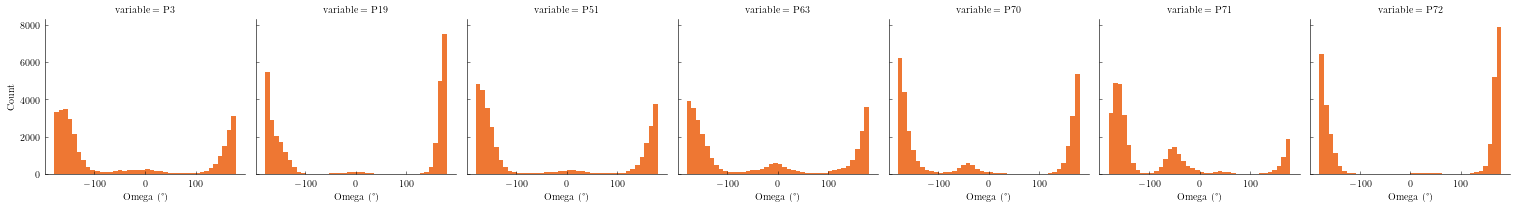

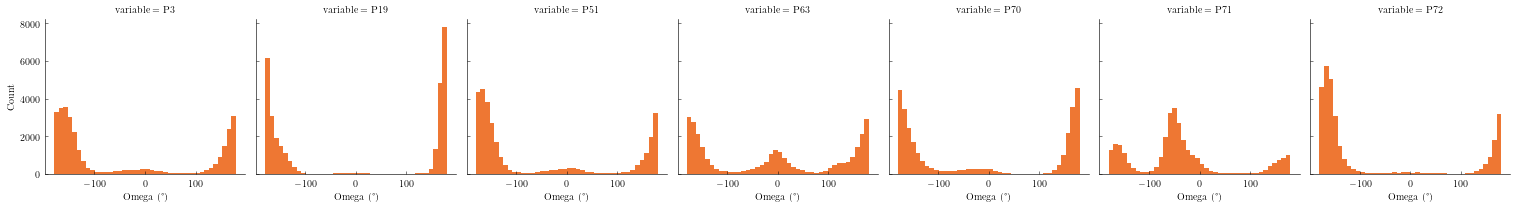

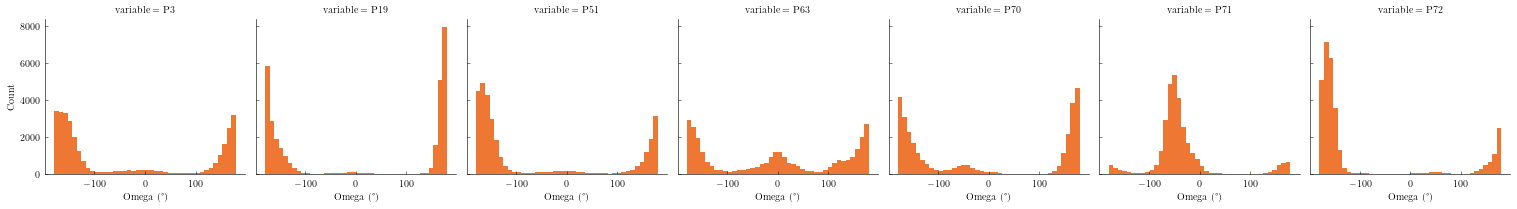

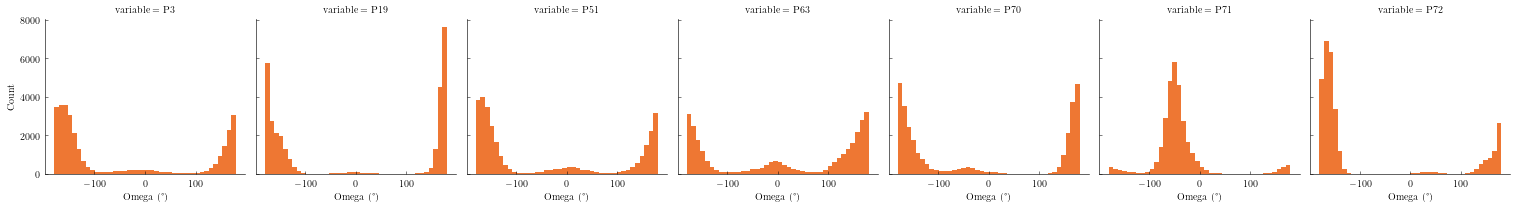

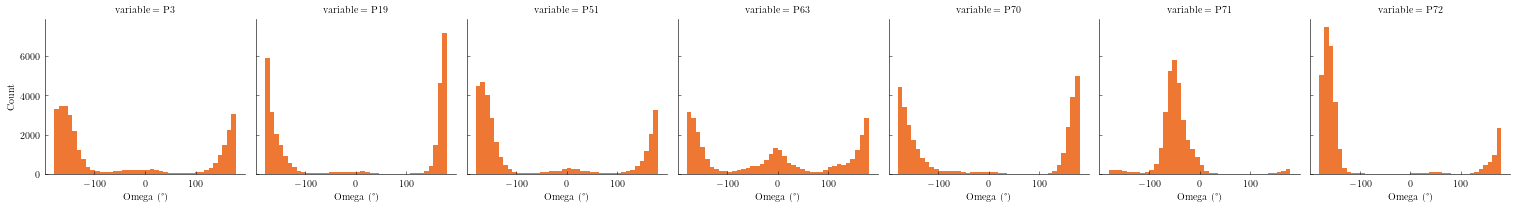

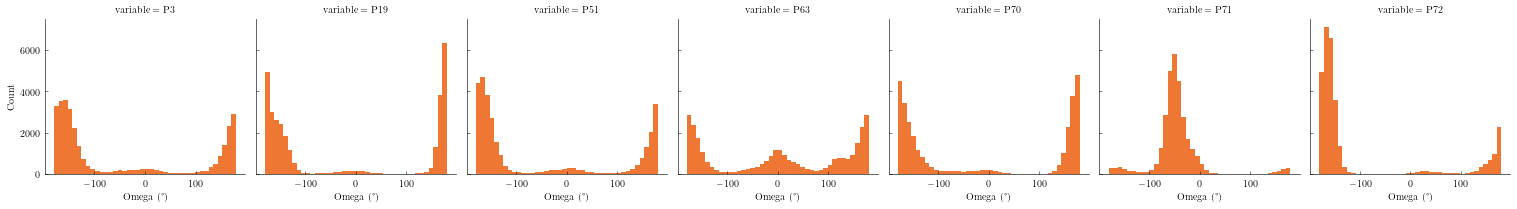

Analyzing barrier_3.5kbT


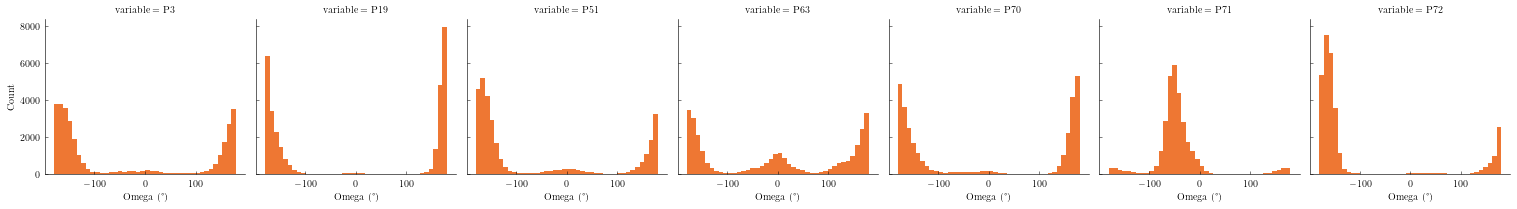

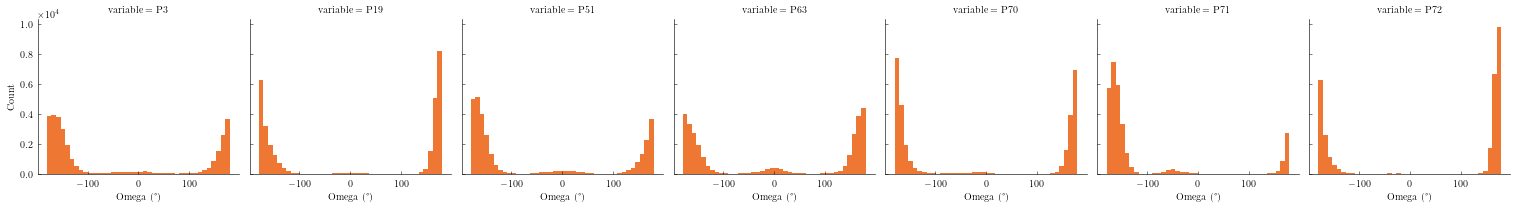

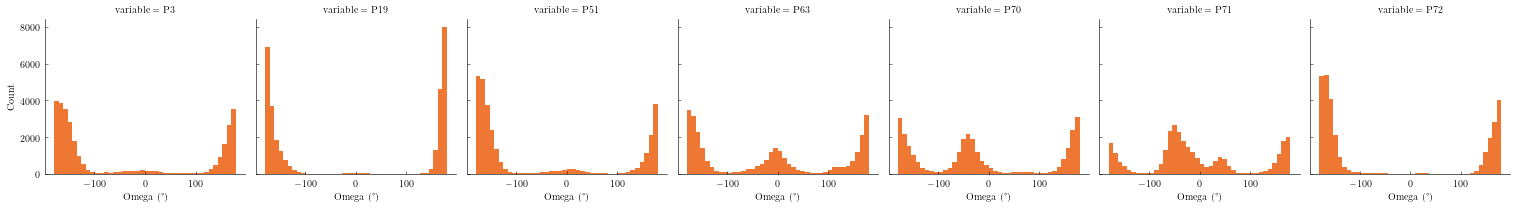

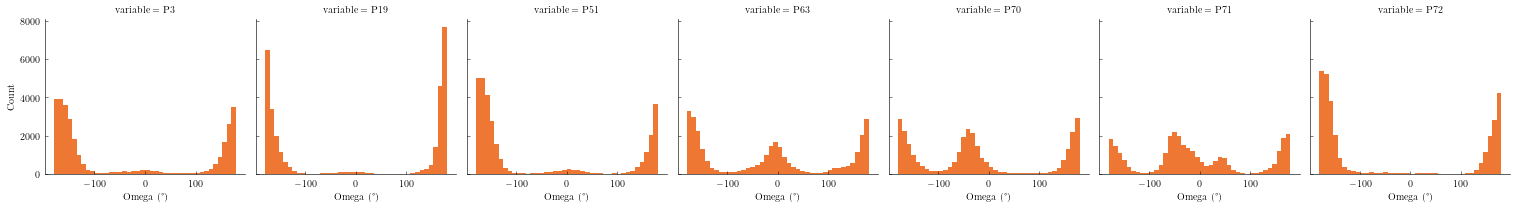

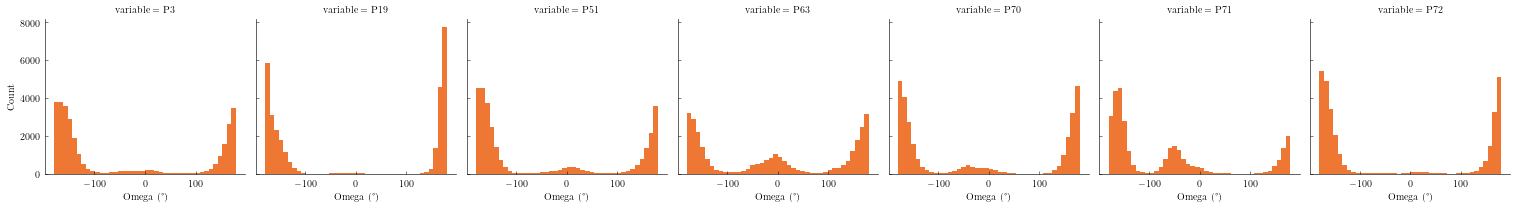

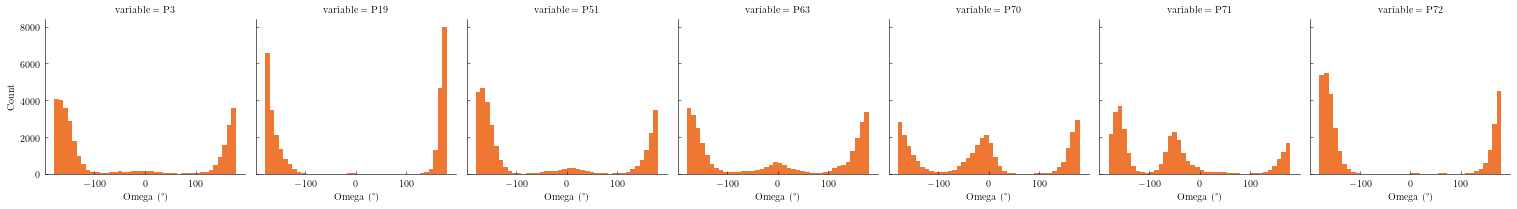

Analyzing barrier_4.0kbT


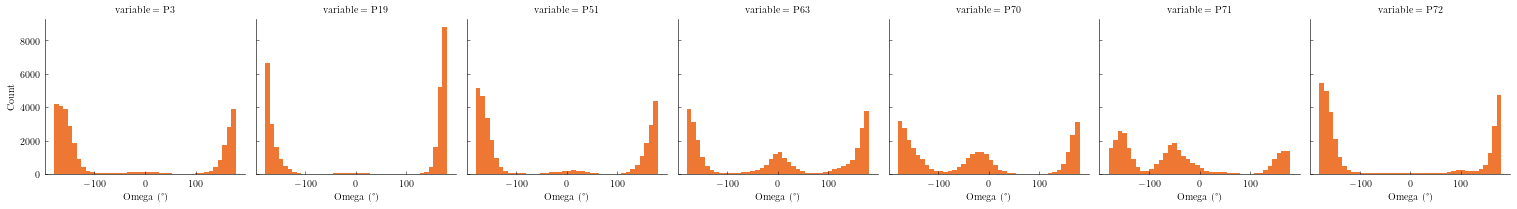

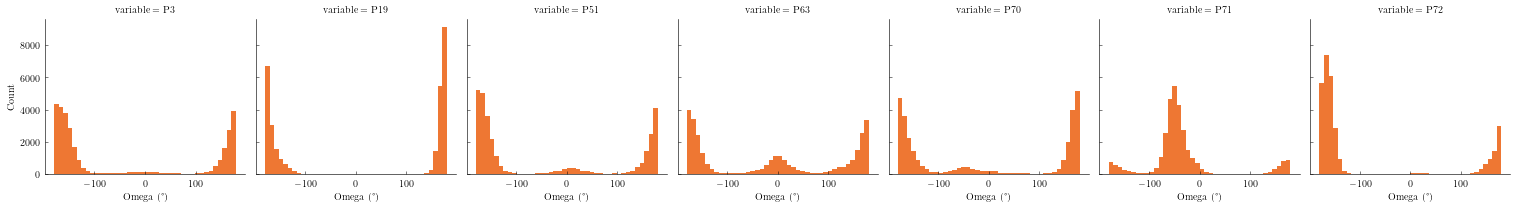

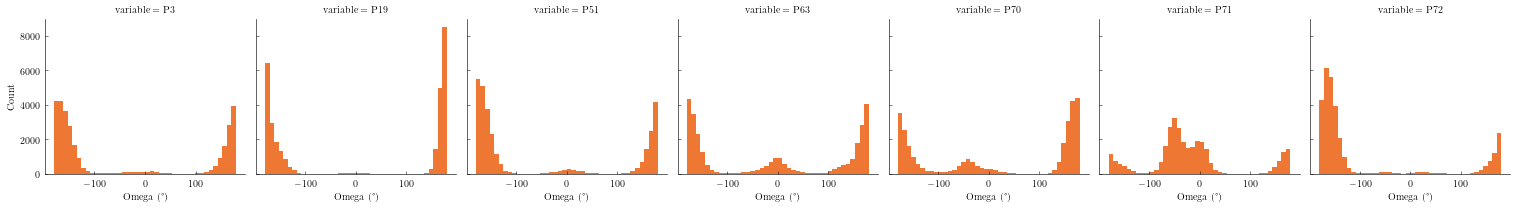

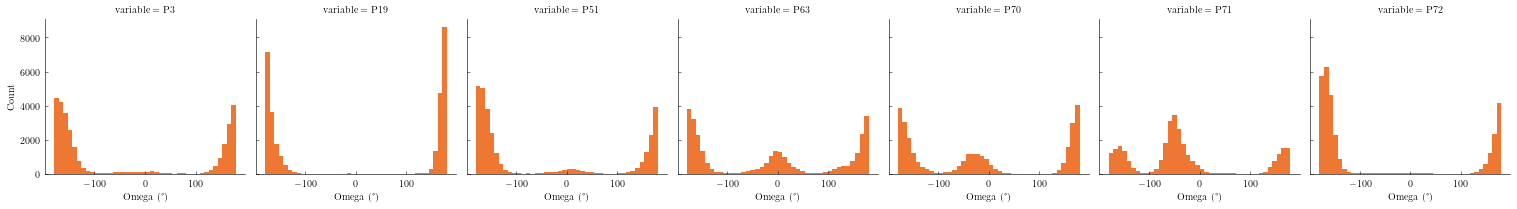

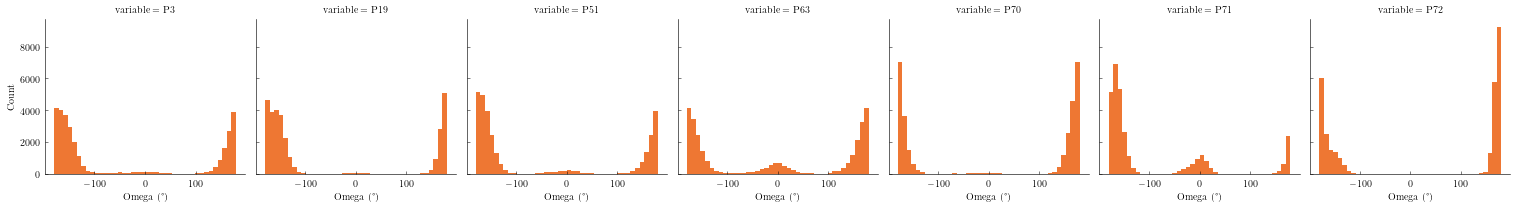

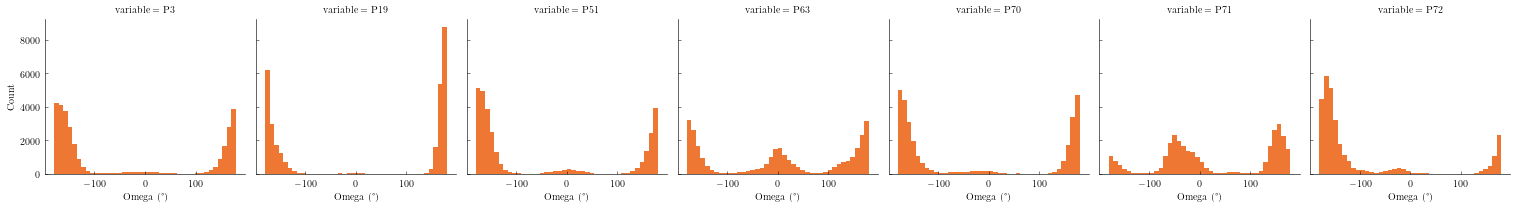

Analyzing barrier_4.5kbT


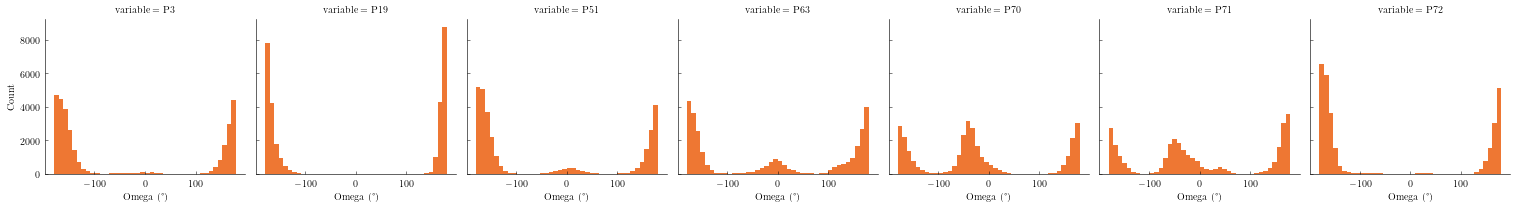

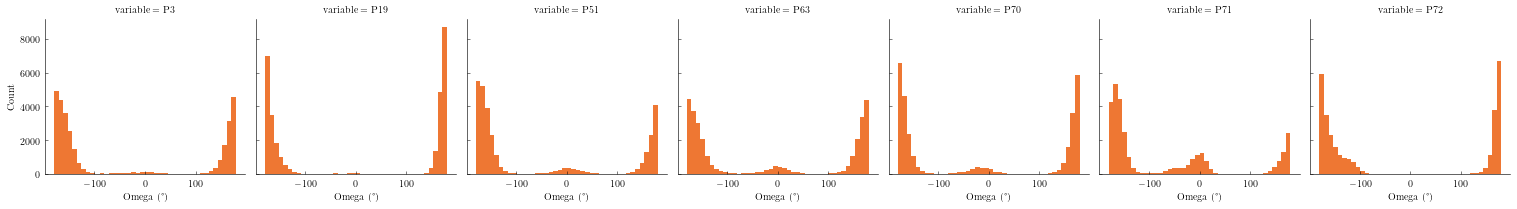

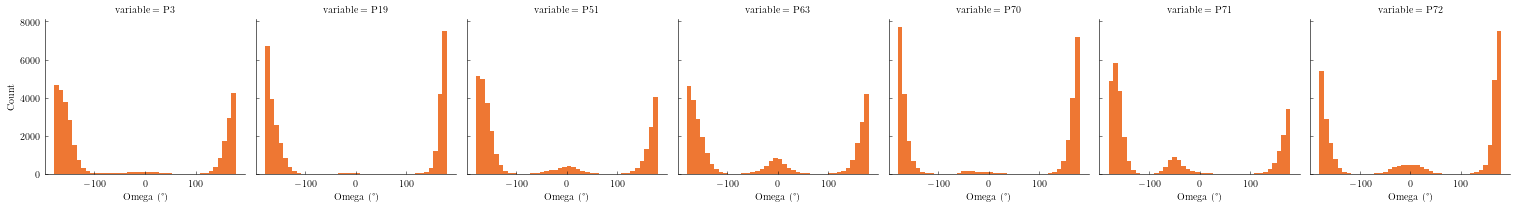

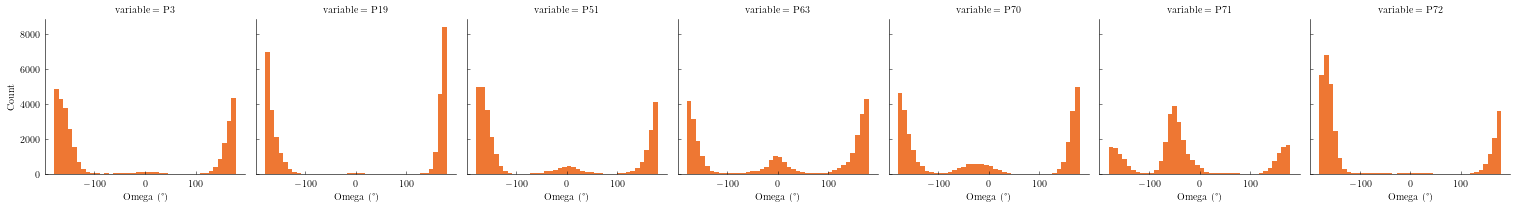

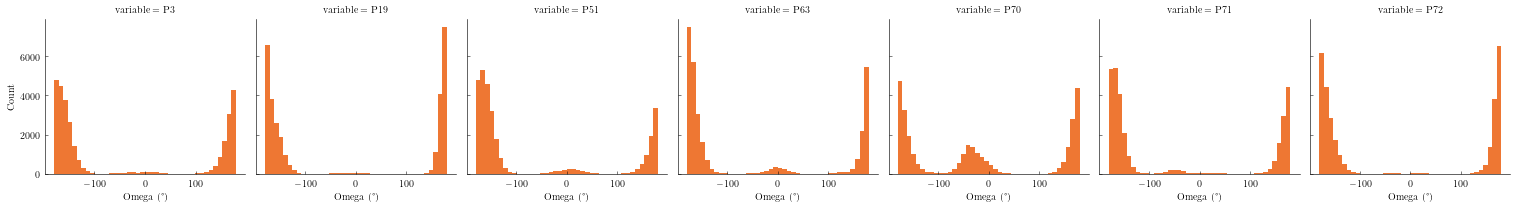

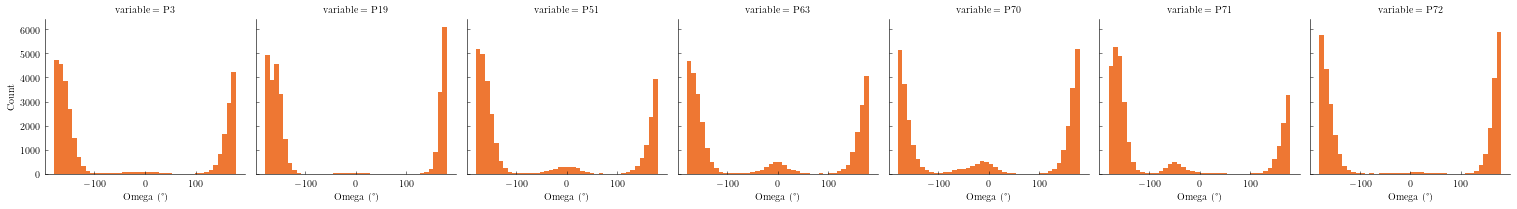

Analyzing barrier_5.0kbT


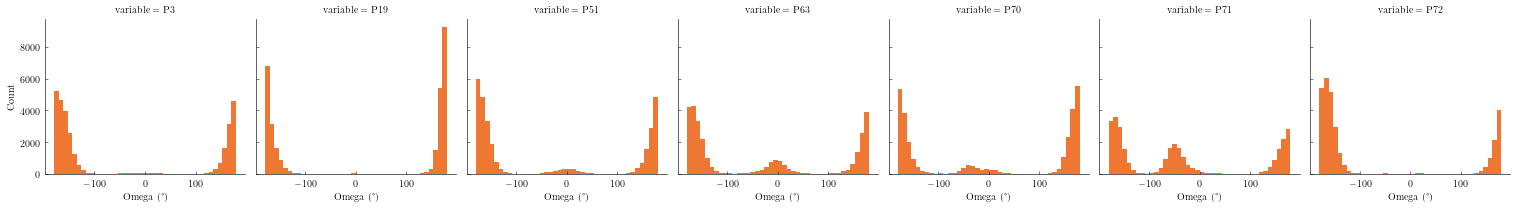

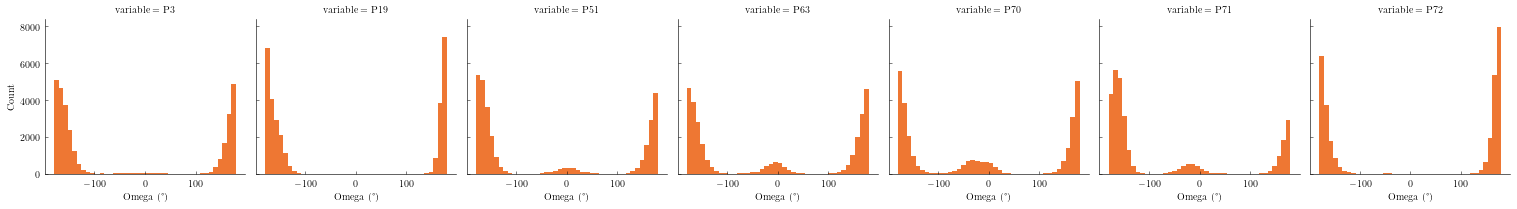

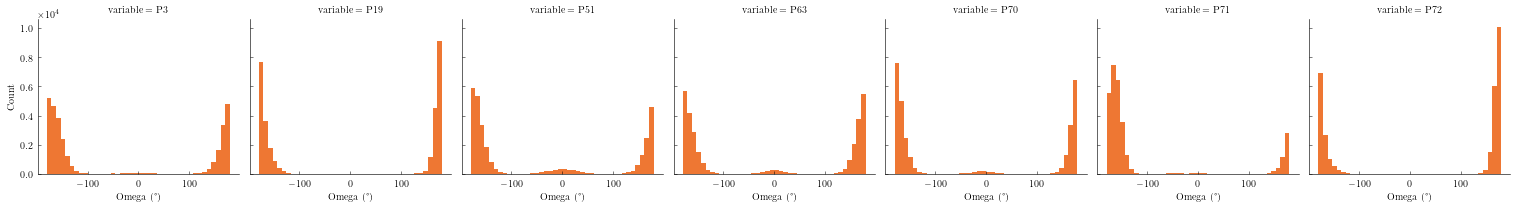

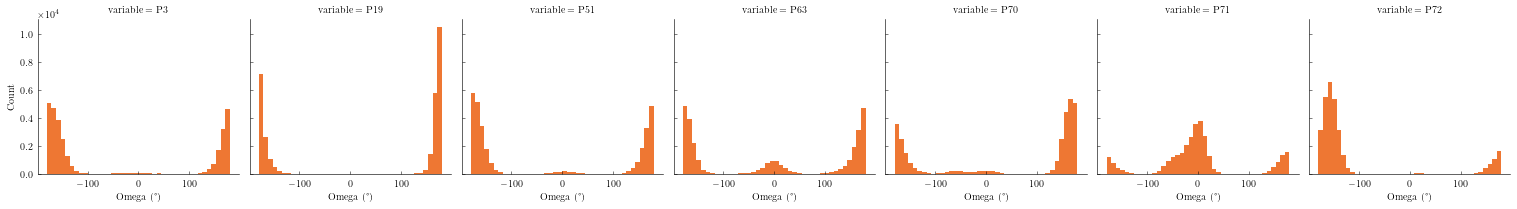

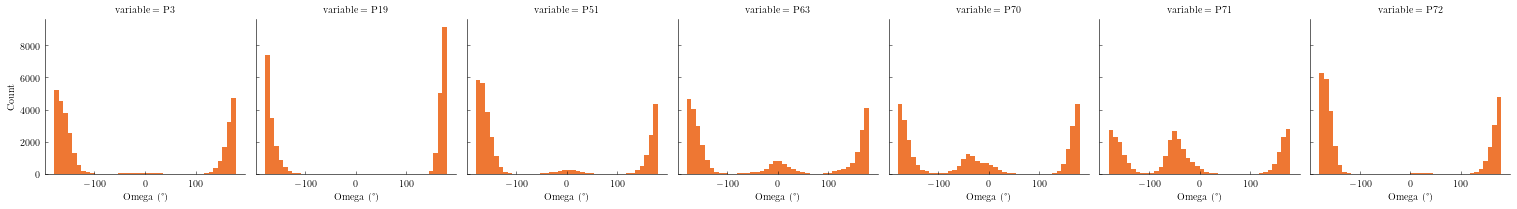

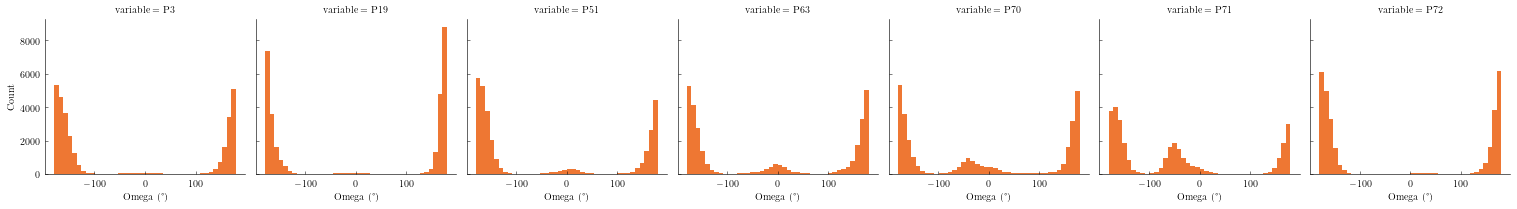

Analyzing barrier_5.5kbT


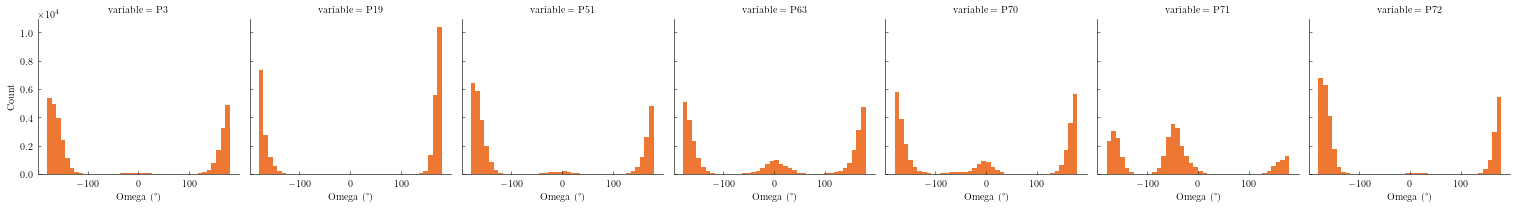

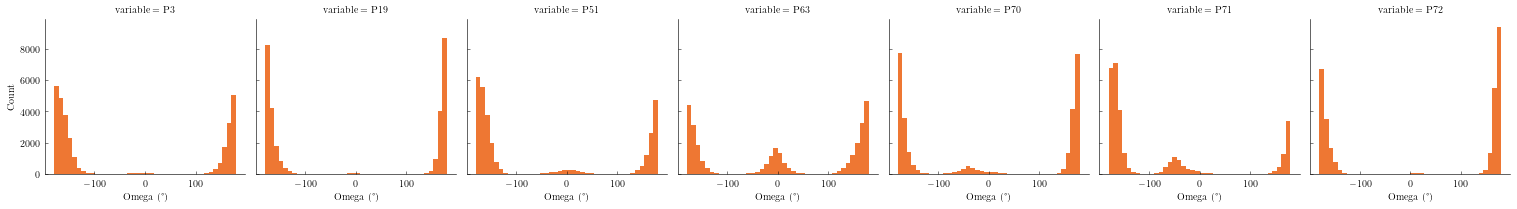

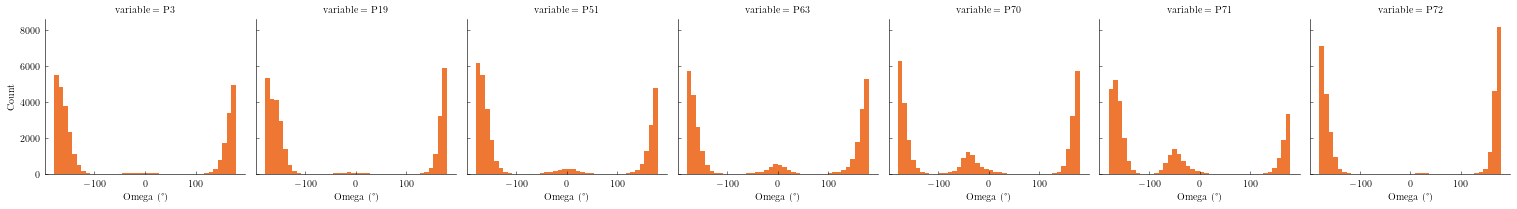

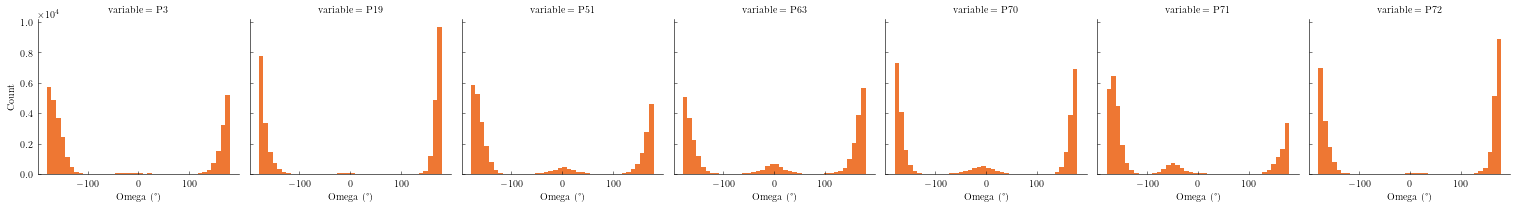

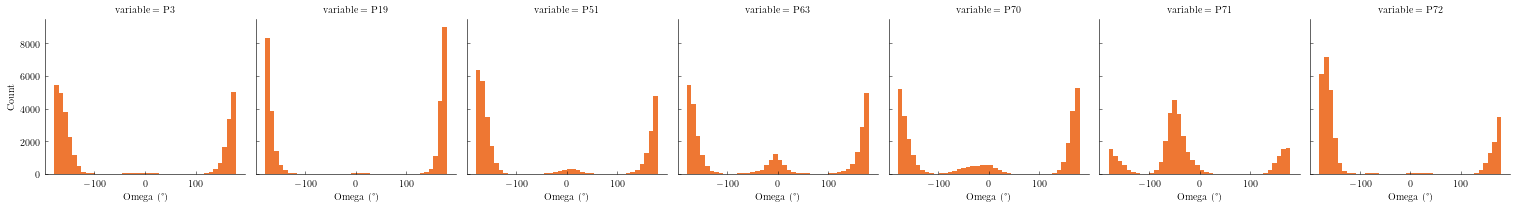

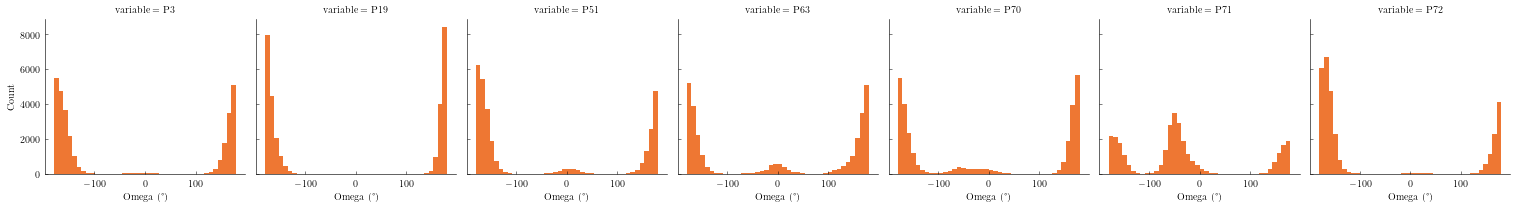

Analyzing barrier_6.0kbT


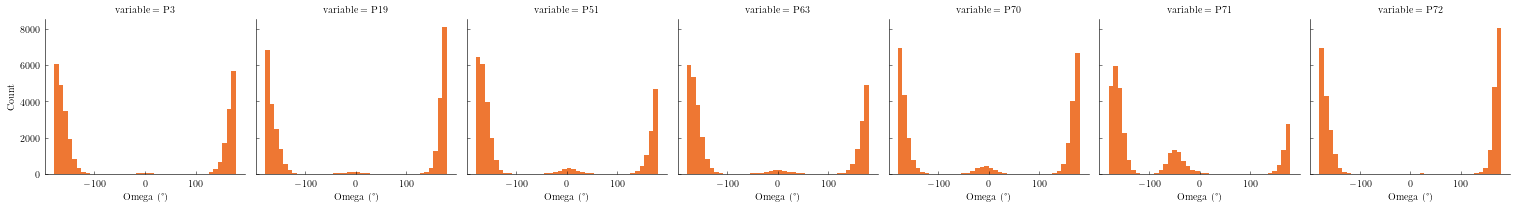

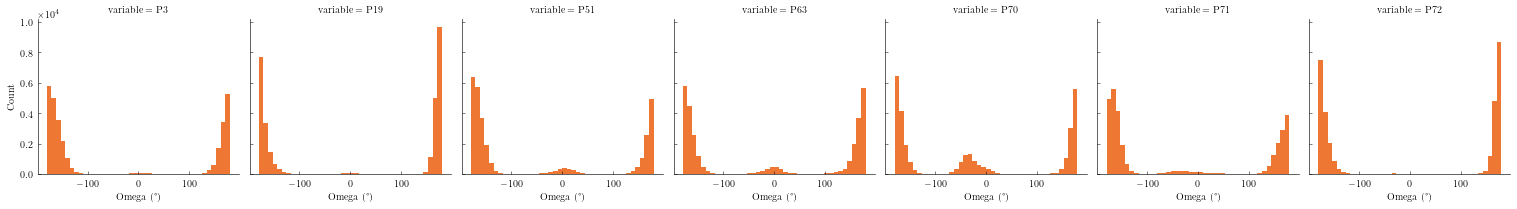

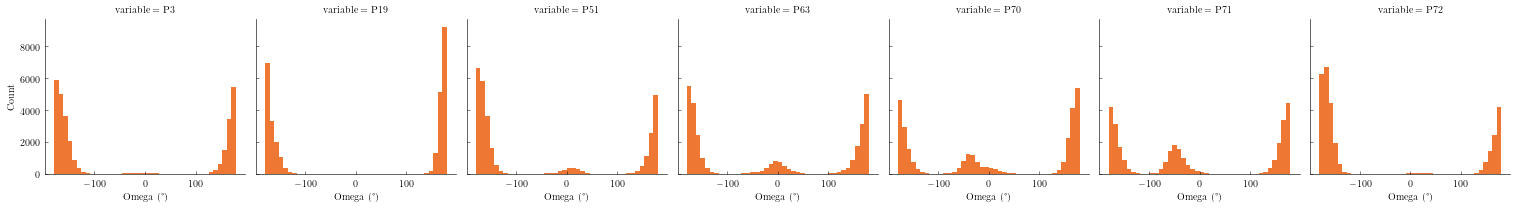

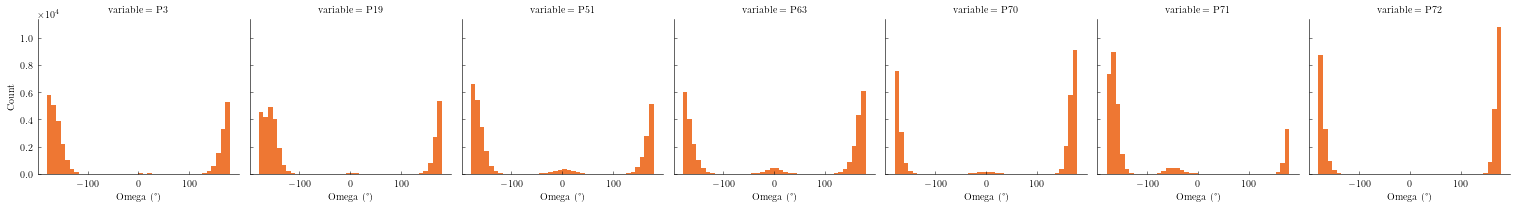

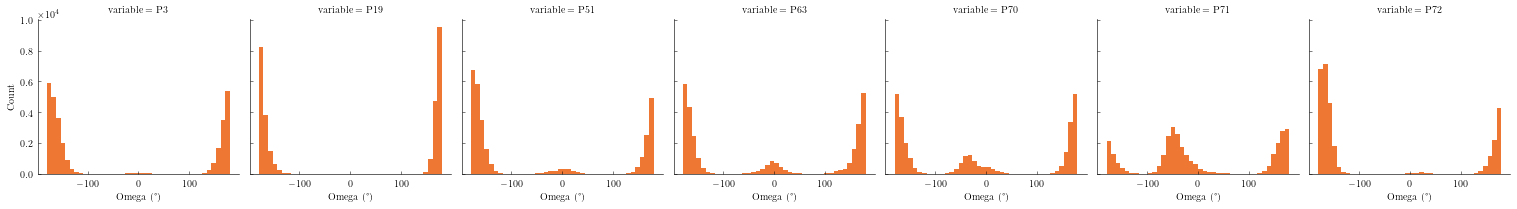

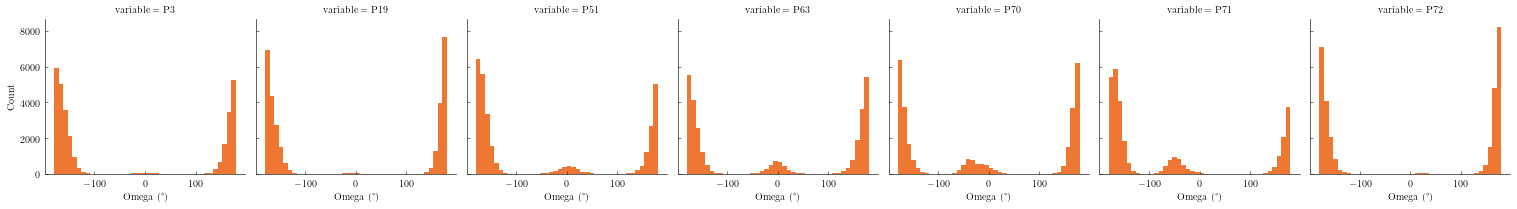

Analyzing barrier_6.5kbT


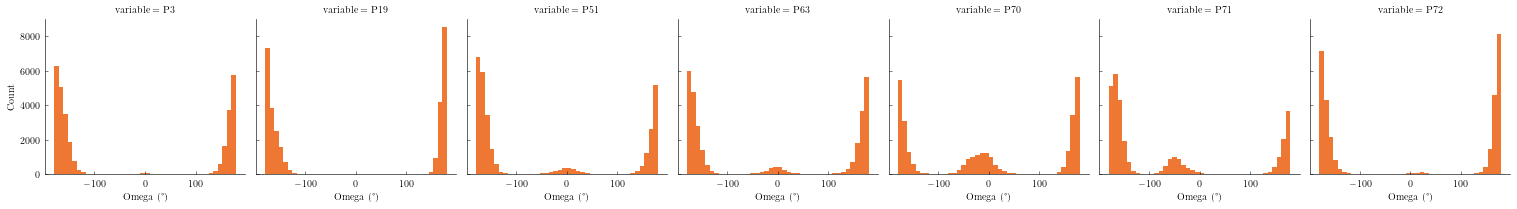

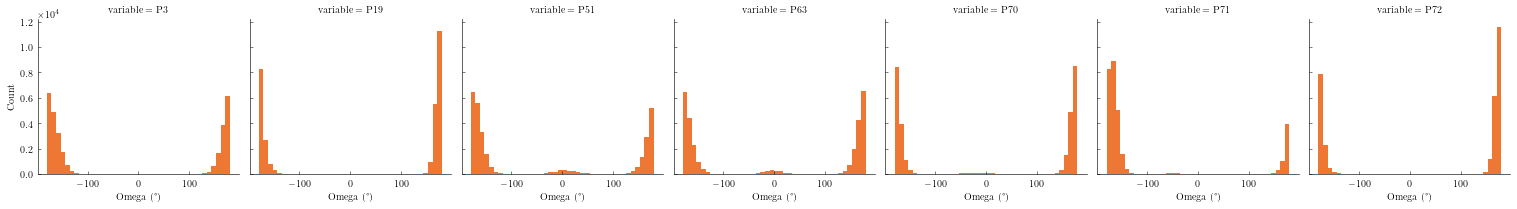

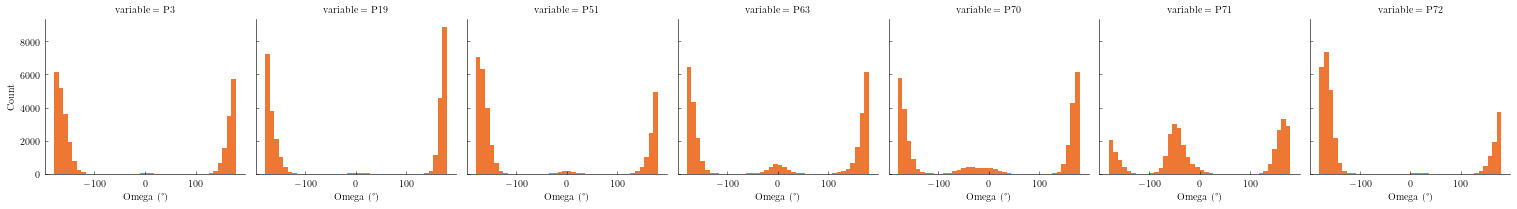

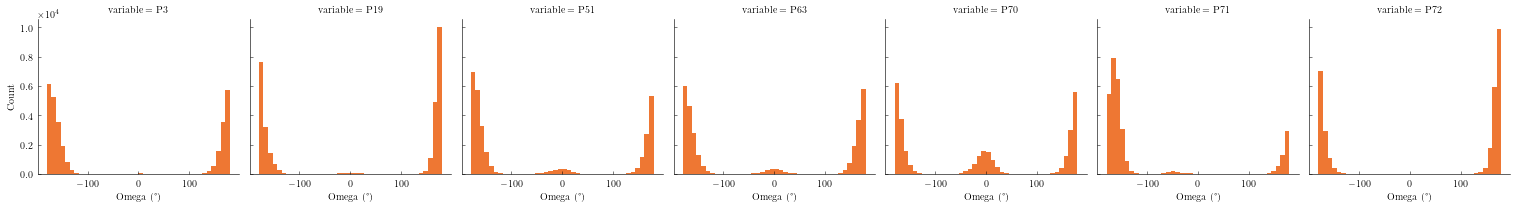

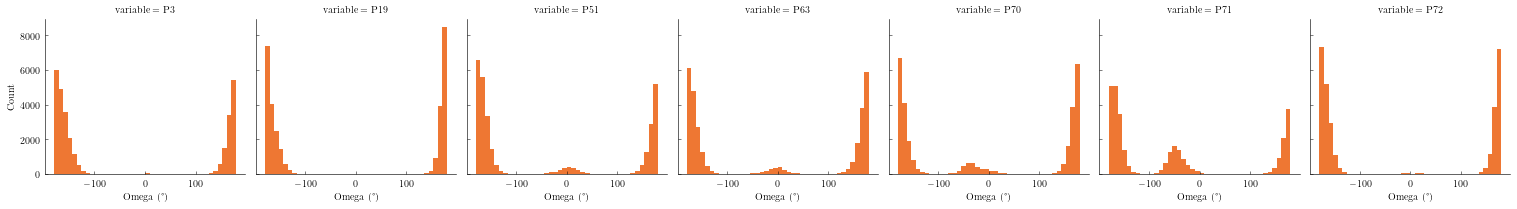

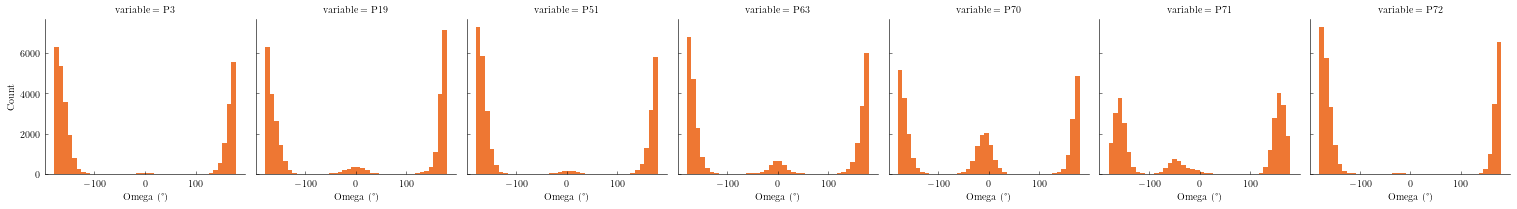

Analyzing barrier_7.0kbT


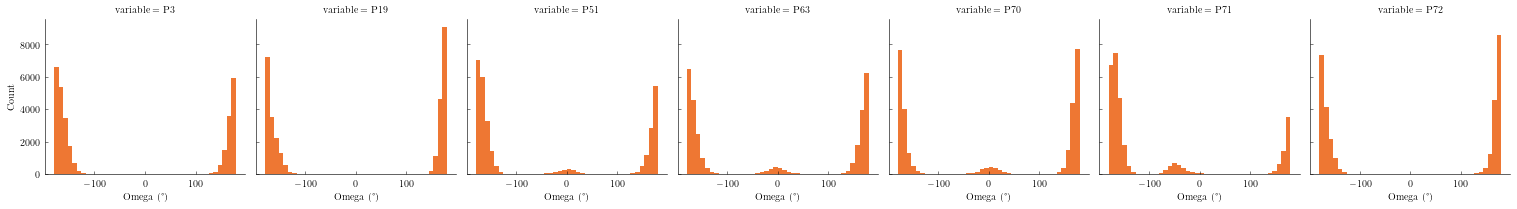

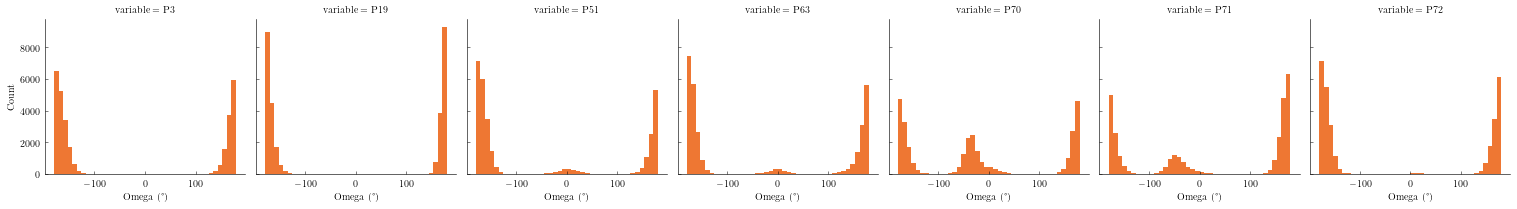

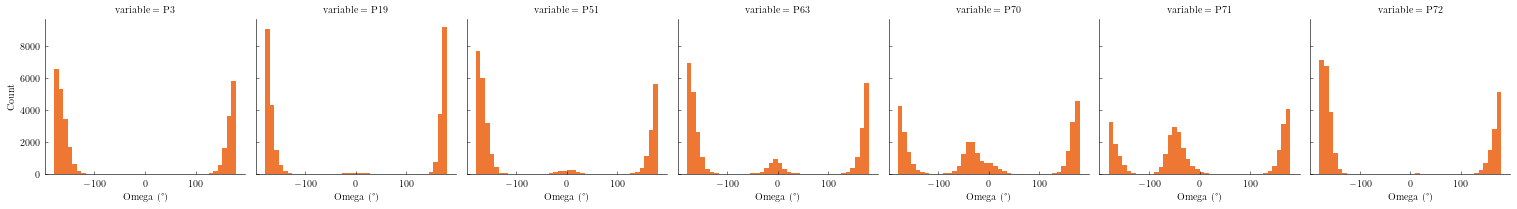

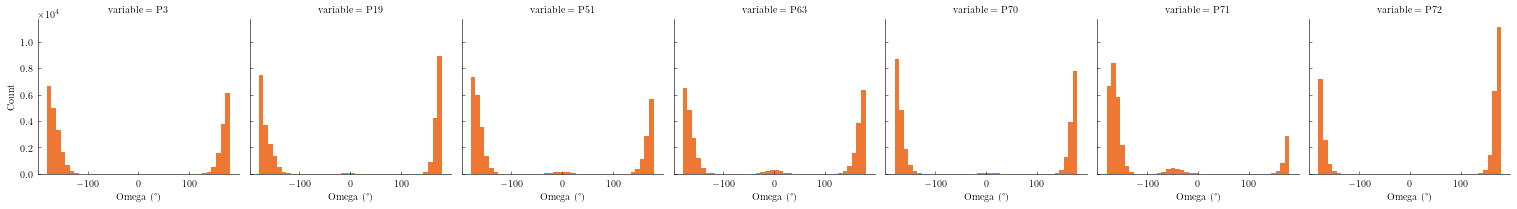

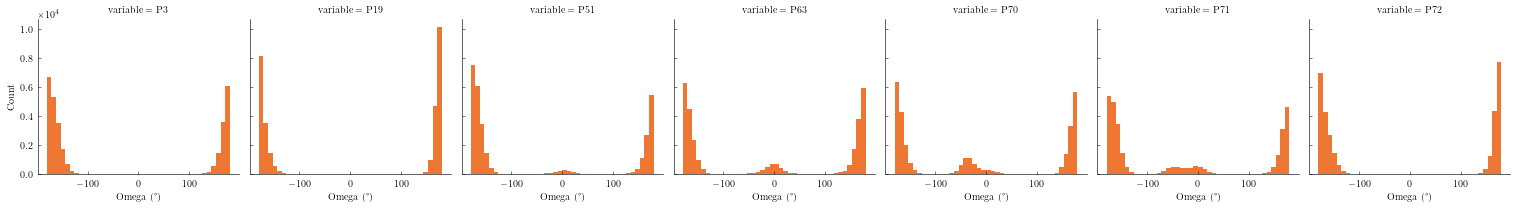

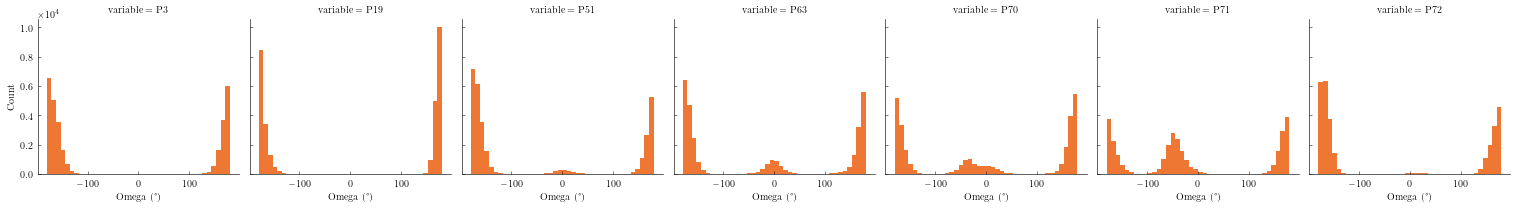

Analyzing barrier_7.5kbT


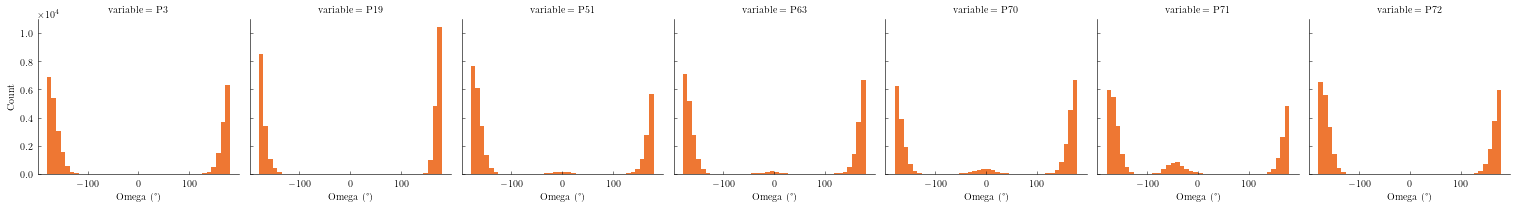

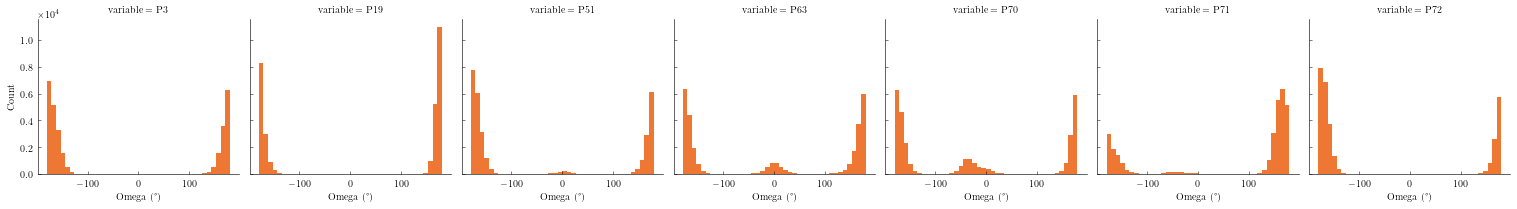

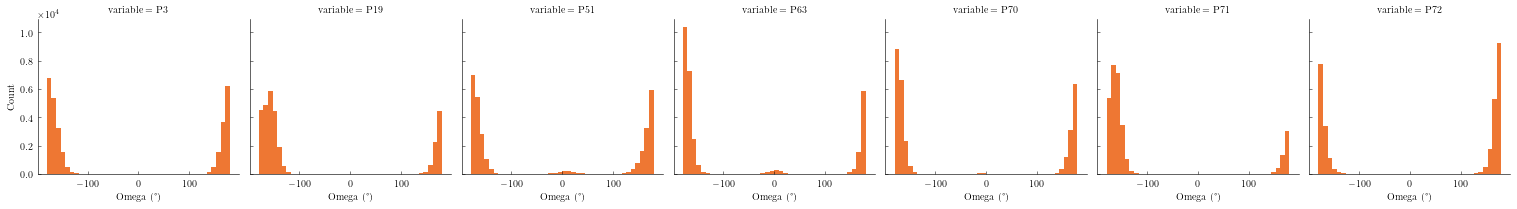

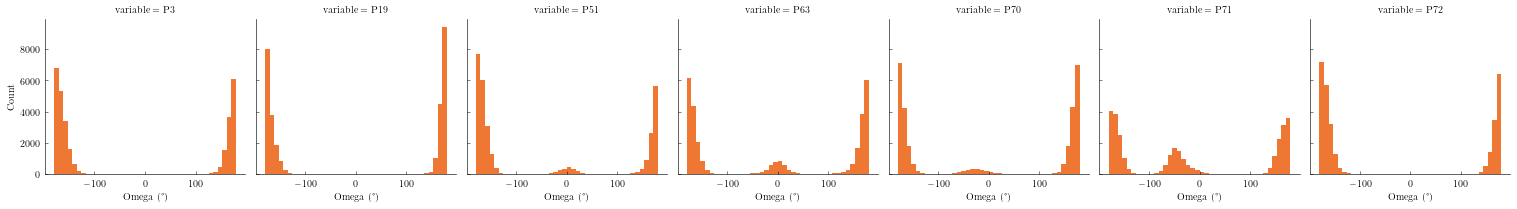

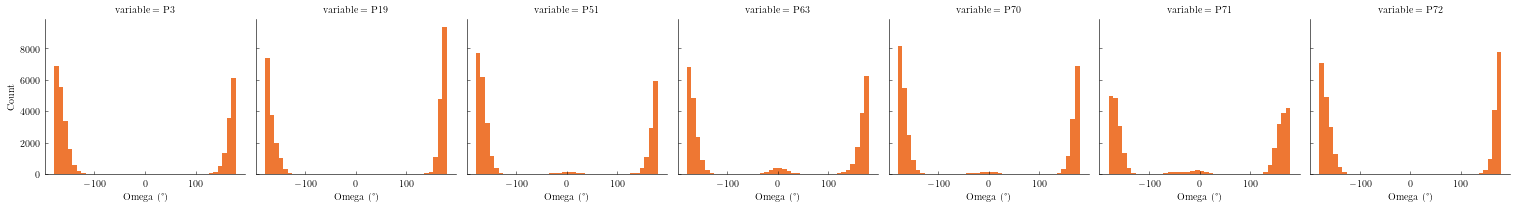

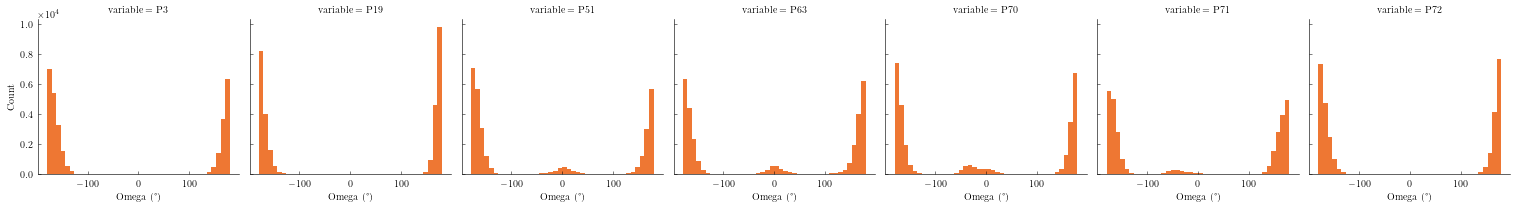

Analyzing barrier_8.0kbT


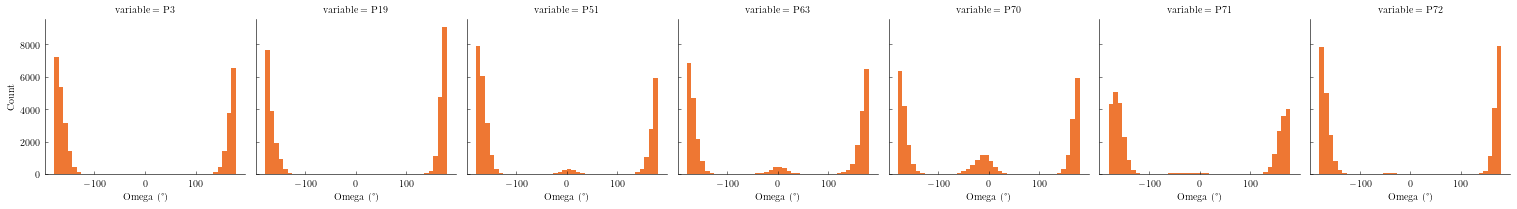

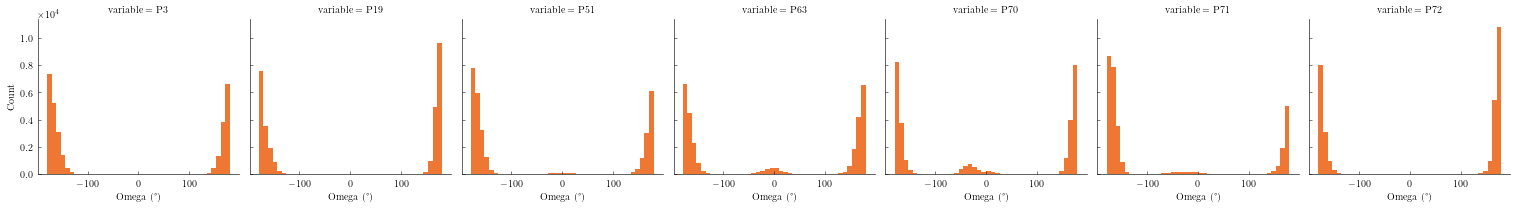

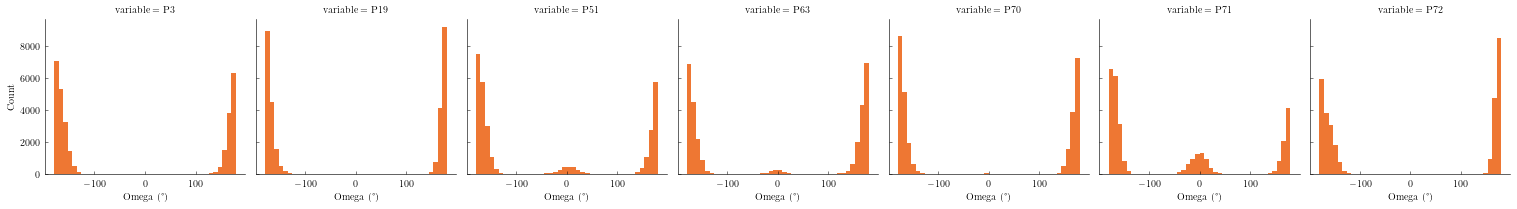

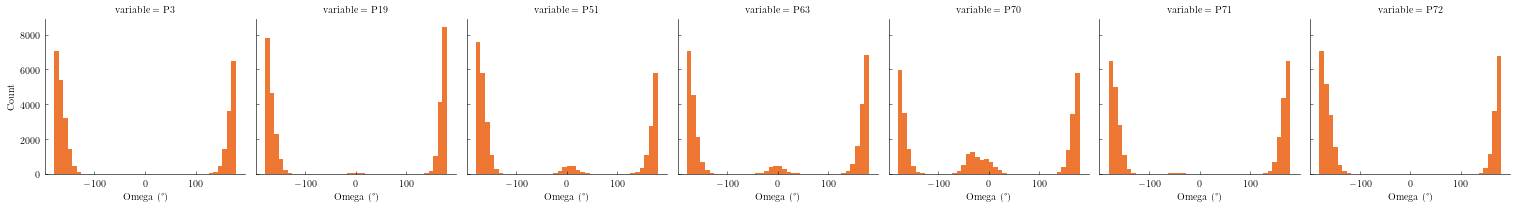

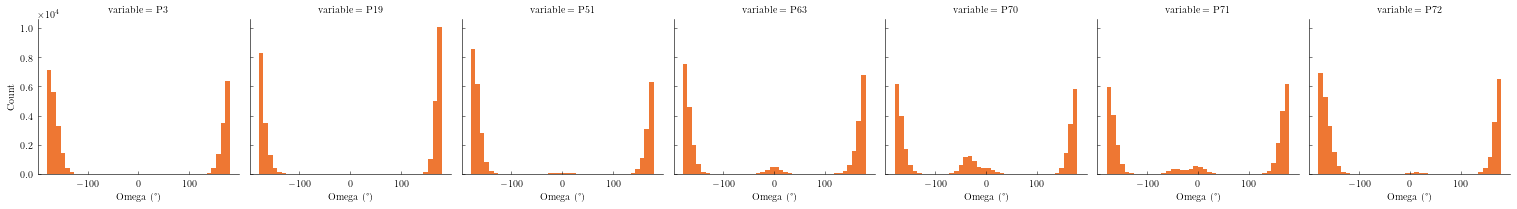

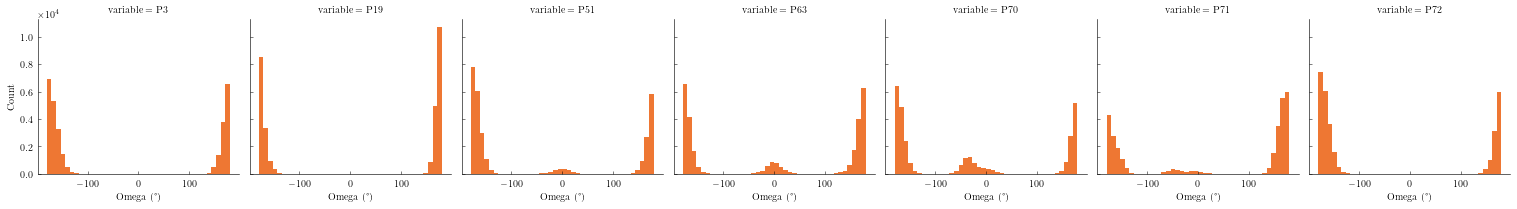

Analyzing barrier_8.5kbT


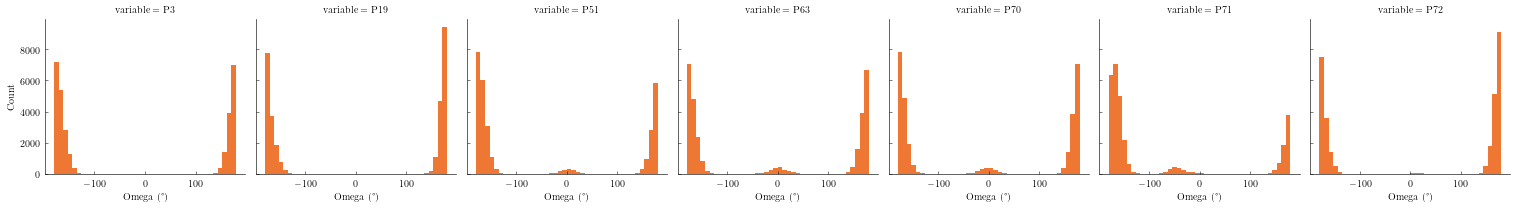

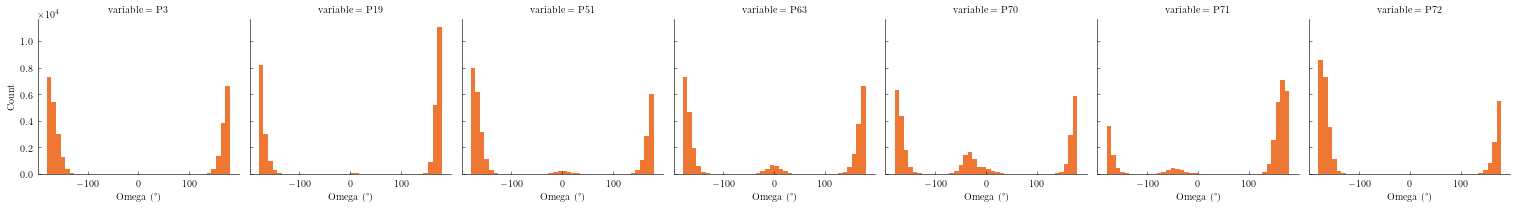

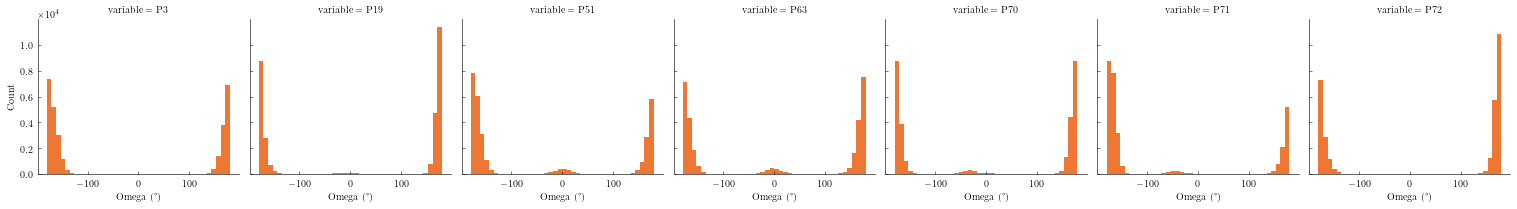

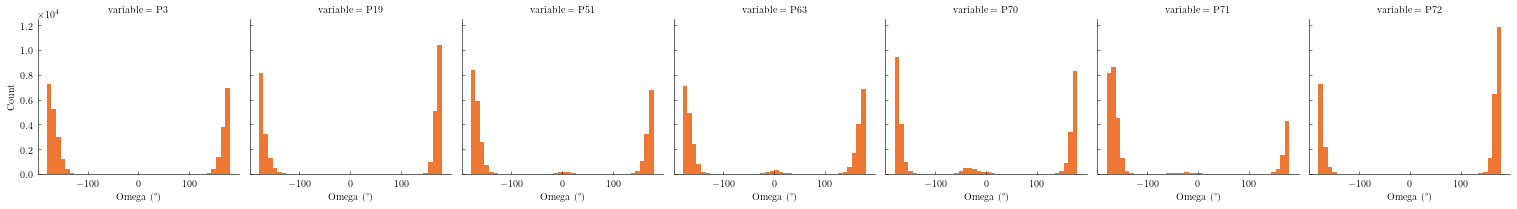

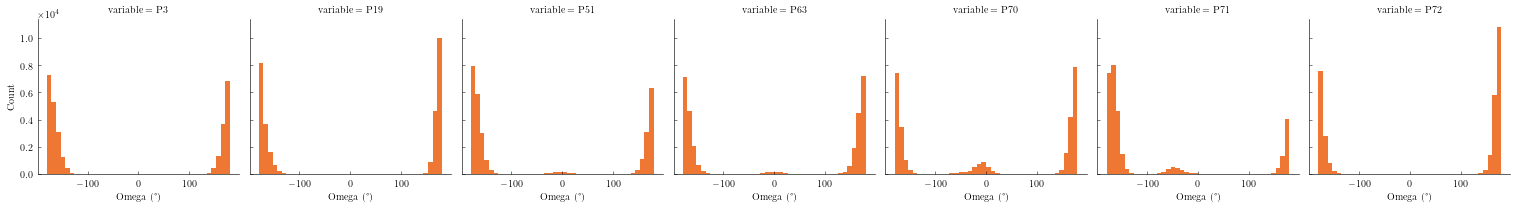

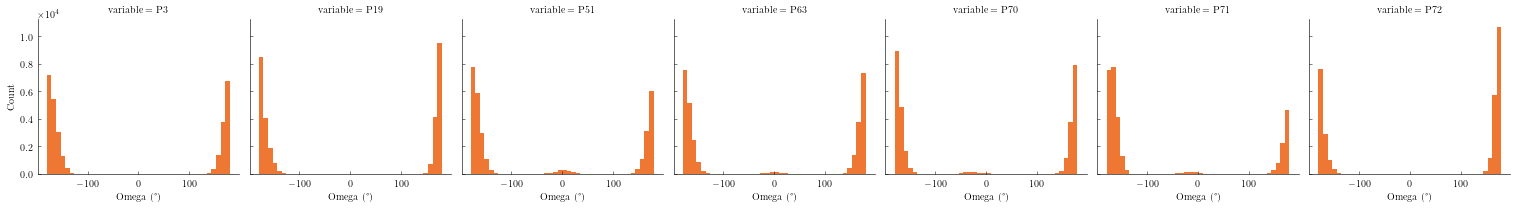

Analyzing barrier_9.0kbT


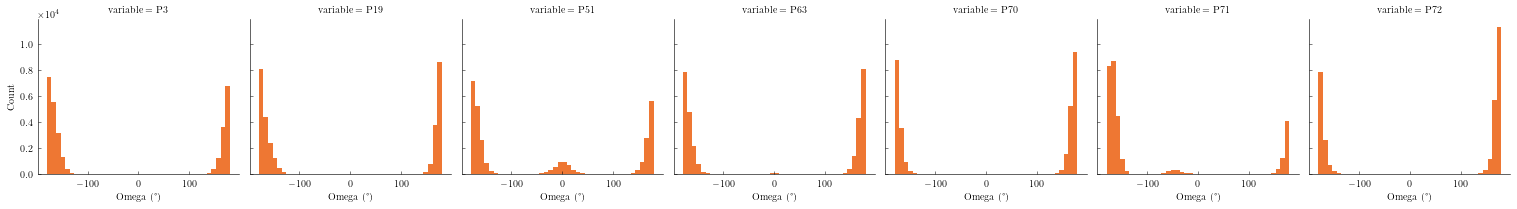

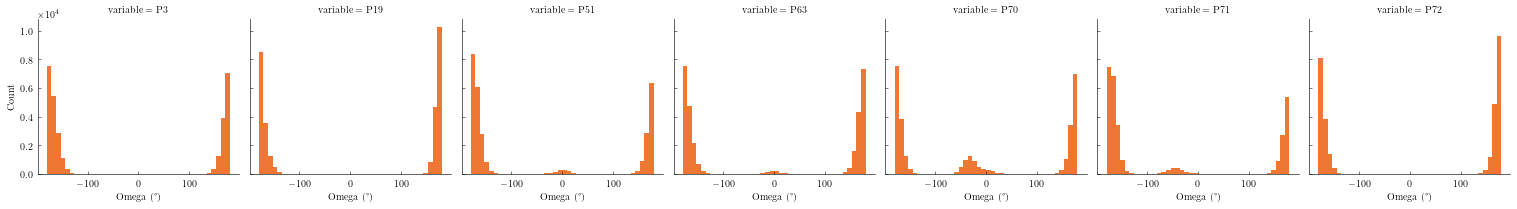

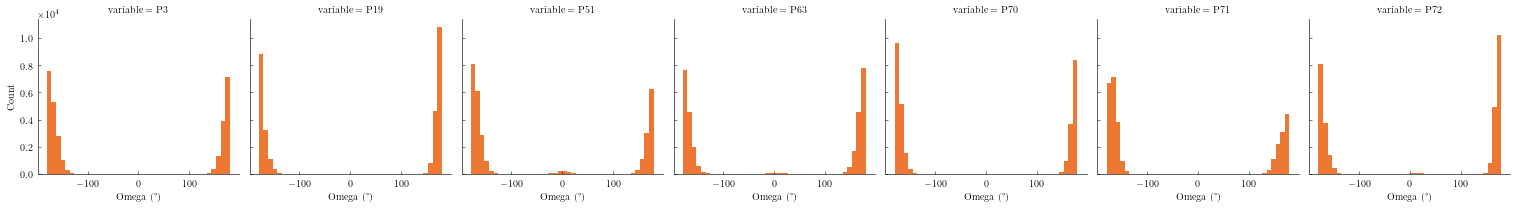

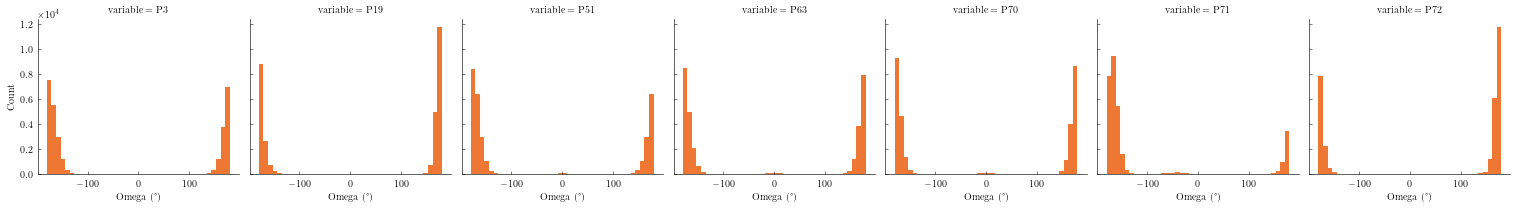

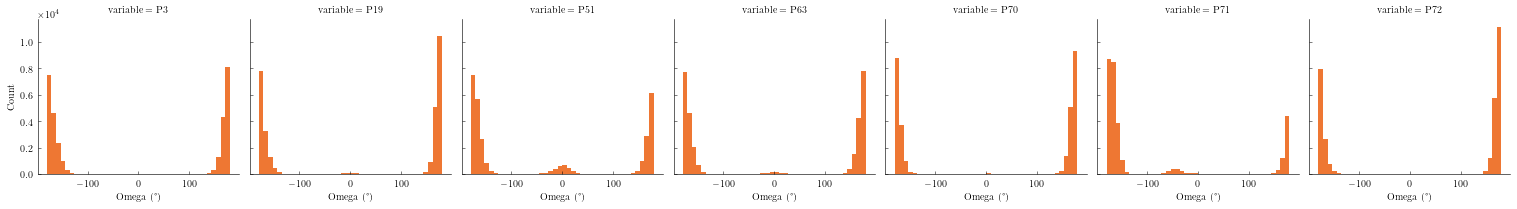

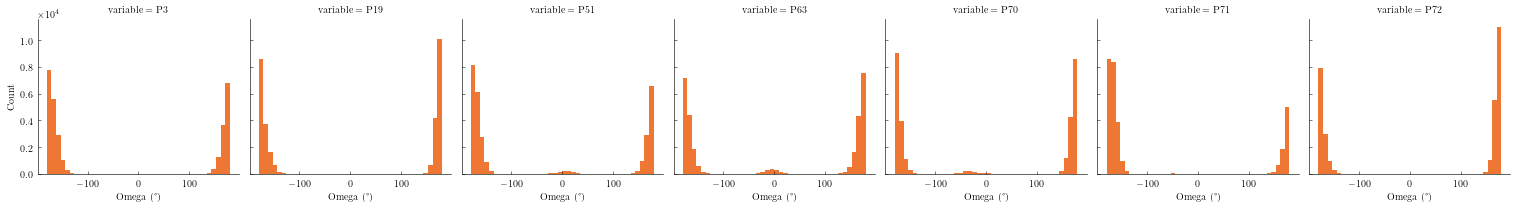

Analyzing barrier_9.5kbT


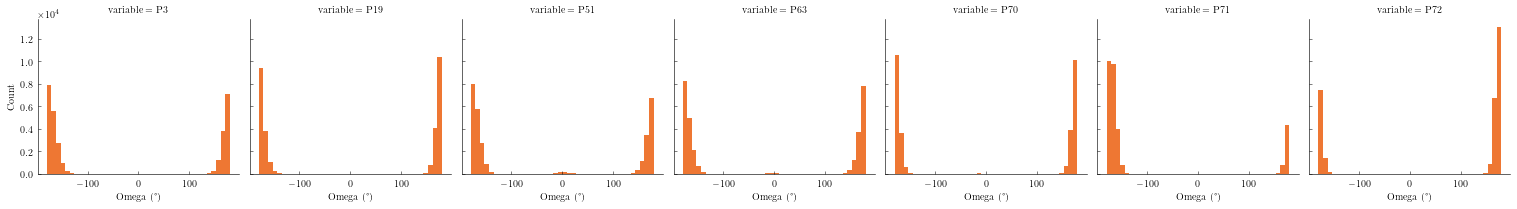

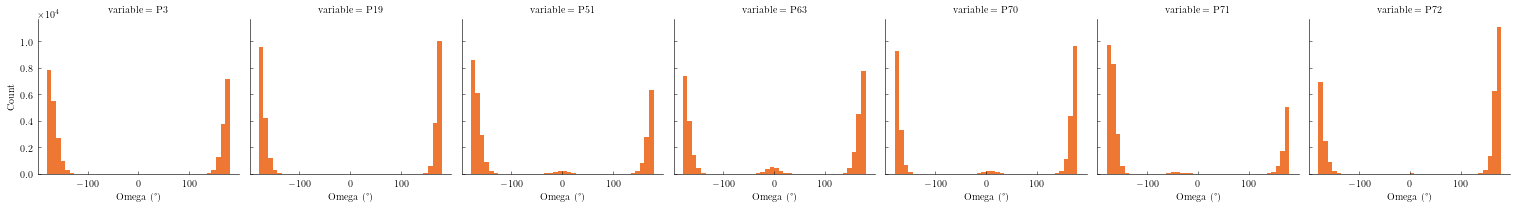

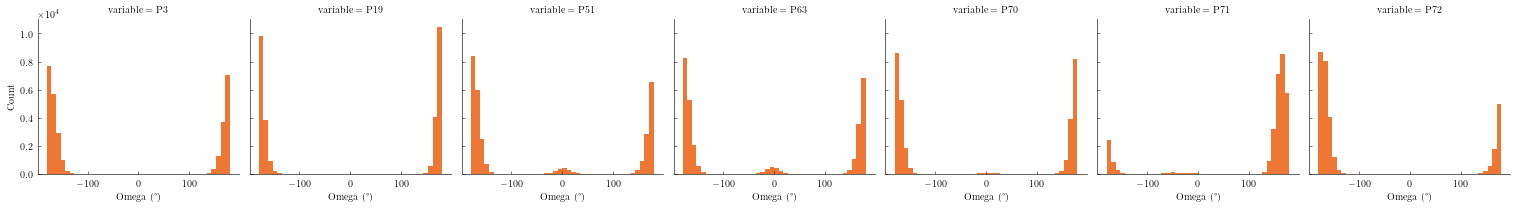

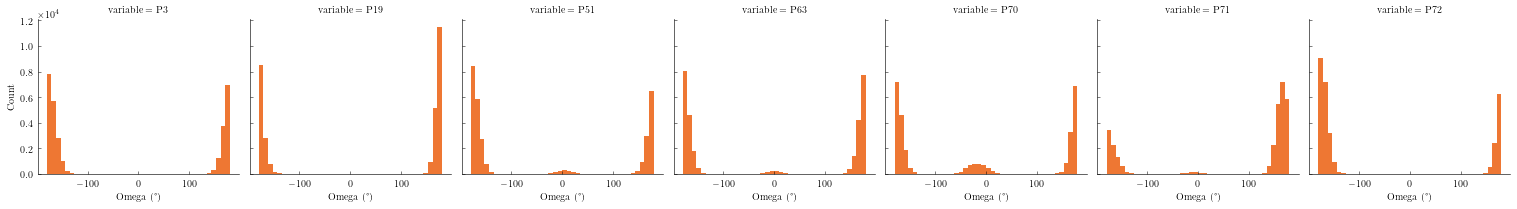

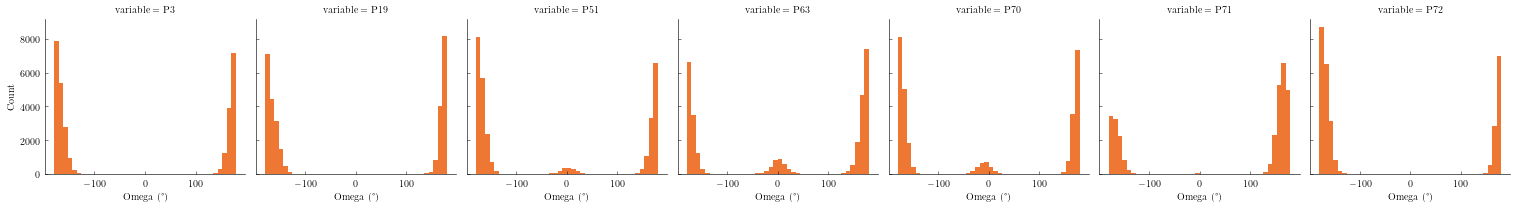

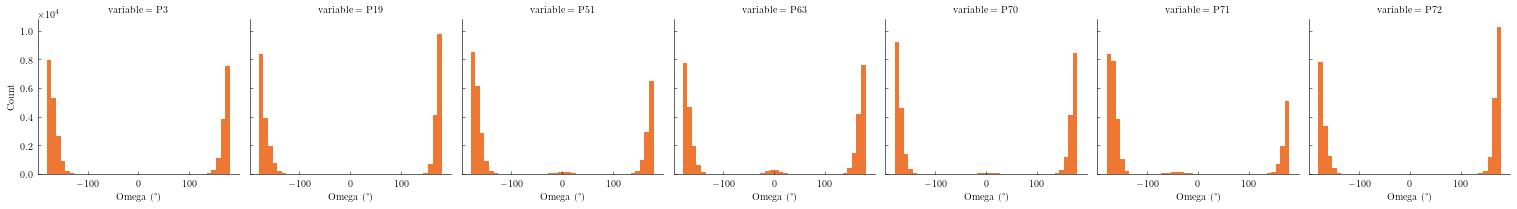

Analyzing barrier_10.0kbT


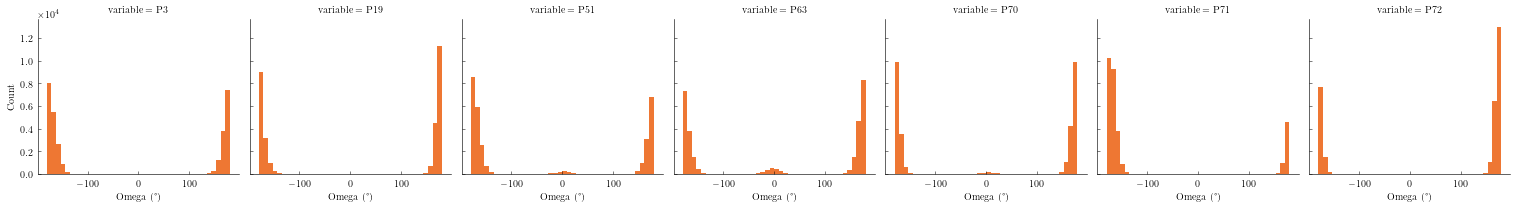

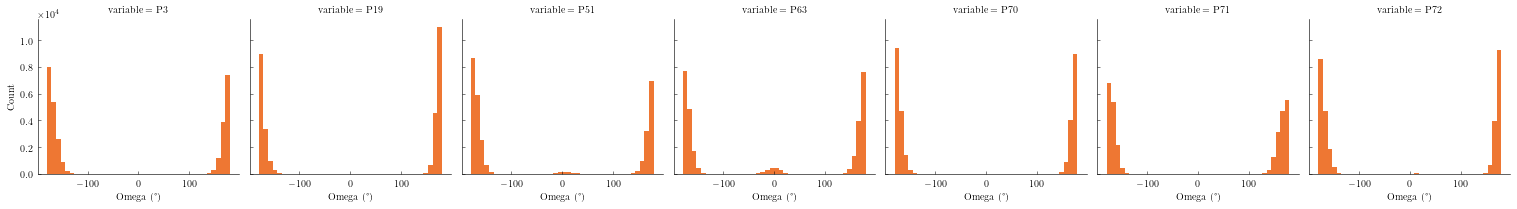

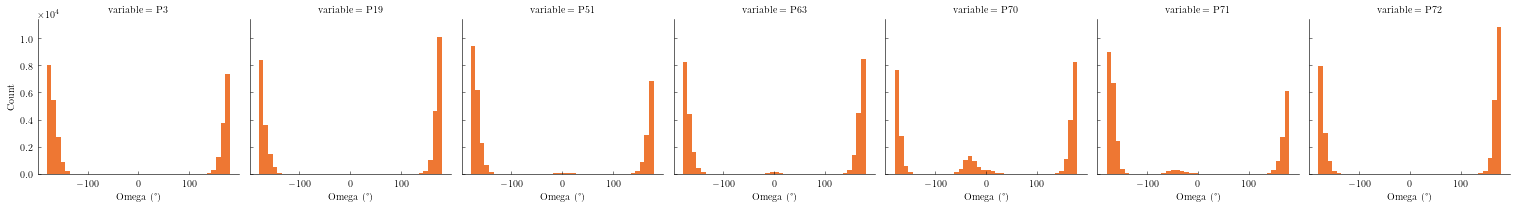

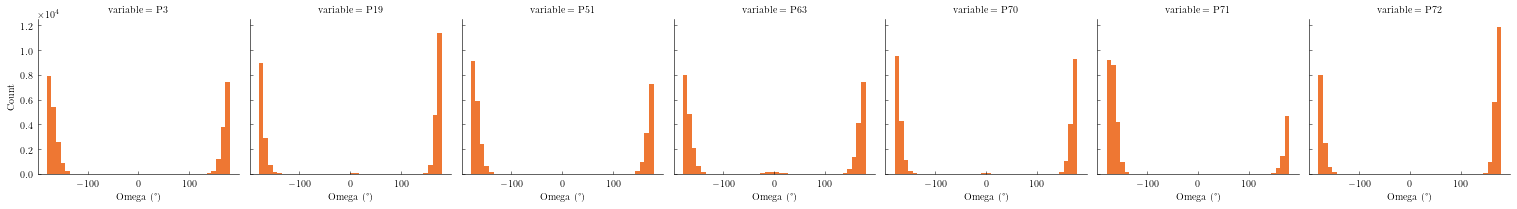

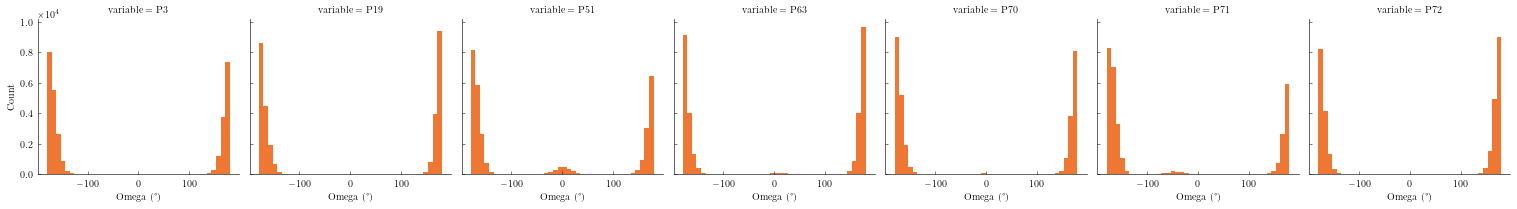

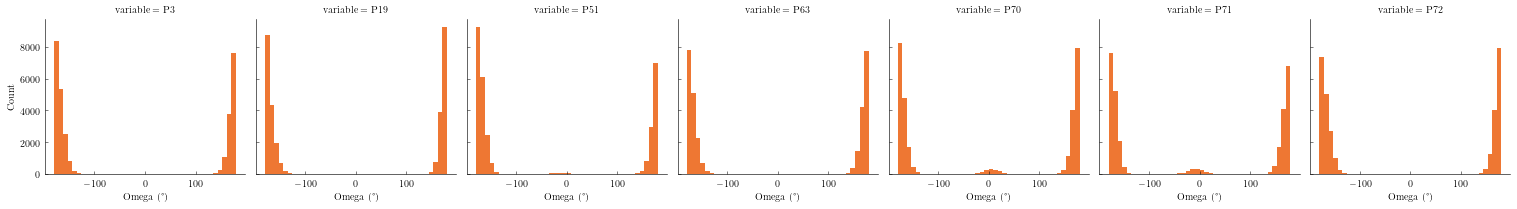

In [10]:
# For every experiment
for exp in exp_list:
    print("Analyzing", exp)
    fp = os.path.join(base, exp, end)
    dfiles = os.listdir(fp)

    c = 0

    tdf = pd.DataFrame(columns=["variable", "value", "run_id"])

    # Do Omega Analysis
    for f in dfiles:
        if ".csv" in f:
            continue
        # Read in the data
        data = np.load(os.path.join(fp, f))
        df = pd.DataFrame(data)
        df.rename(
            columns={0: "P3", 1: "P19", 2: "P51", 3: "P63", 4: "P70", 5: "P71", 6: "P72"}, inplace=True
        )
        df = df * 180 / (np.pi)

        # Convert to long form
        df = df.melt(value_vars=df.columns)
        idx = f.rfind("_")
        df["run_id"] = f[idx - 2 : idx]

        # Graph the first 6 runs as a sanity check
        # (Only really relevent in notebook)
        if c < 6 and visual == True:
            grid = sns.FacetGrid(df, col="variable", palette="husl", col_wrap=7)

            grid.map(plt.hist, "value", bins=40)
            grid.set_ylabels("Count", fontsize=10)
            grid.set_xlabels("Omega (\u00b0)", fontsize=10)
            plt.show()

        # Convert into 0/1. 1 for trans and 0 for cis
        df.loc[df["value"].abs() < 90, "ct"] = 0
        df.loc[df["value"].abs() >= 90, "ct"] = 1
        tdf = pd.concat([tdf, df])
        c += 1
    # tdf.to_csv(os.path.join(fp, exp + "_omega_dat_throughput.csv"), index=False)

# Check number of proline switches

In [11]:
%%time
base = '/project2/dinner/darrenjl/kaiB/03152023_barrier_testing/'
experiments = ['barrier_2.5kbT','barrier_5.0kbT','barrier_10.0kbT']
experiments = [experiments[0]]
end = 'cis/run_0/results'
steps = 29998

for exp in experiments:
    print('Reading in',exp)
    fp = os.path.join(base,exp,end)
    files = os.listdir(fp)
    files = [i for i in files if 'throughput' in i]
    
    path = os.path.join(fp,files[0])
    
    df = pd.read_csv(path)
    df['step'] = np.array(df.index.tolist())%steps
    df.rename(columns = {'variable':'Proline',}, inplace = True)
    df = df[df['Proline'].isin(['P63','P70','P71','P72'])]
    break

Reading in barrier_2.5kbT
CPU times: user 1.92 s, sys: 329 ms, total: 2.25 s
Wall time: 2.5 s


In [12]:
df

Proline       value  run_id   ct   step
89994       P63   -2.353016      11  0.0      0
89995       P63  -17.633913      11  0.0      1
89996       P63  -14.952834      11  0.0      2
89997       P63  -19.416370      11  0.0      3
89998       P63    1.153252      11  0.0      4
...         ...         ...     ...  ...    ...
5039659     P72  177.844120       7  1.0  29993
5039660     P72 -129.962270       7  1.0  29994
5039661     P72 -130.957340       7  1.0  29995
5039662     P72 -176.987490       7  1.0  29996
5039663     P72 -179.754400       7  1.0  29997

[2879808 rows x 5 columns]

In [16]:
a = df[(df['run_id'] == 0) & (df['step'] > 0) & (df['step'] < 9000)]
g = sns.catplot(a, x = 'step', y = 'Proline', hue = 'ct', dodge = True, aspect = 10, height = 50, s = 20)
# g.fig.set_fig_inches((3, 2))
plt.axvline(6213)
plt.show()